# Pré-Processamento de dados de texto Extraídos de Data Lake

### Importando as bibliotecas

In [26]:
# Imports
import json
import  pymongo
import  numpy as np
import  pandas as pd
import  matplotlib.pyplot as plt
import  seaborn as sns
import panel as pn
import hvplot.pandas
from datetime import time 

In [3]:
!pip install -q pymongo


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Conectando no Data Lake Mongodb

In [2]:
# Abra a conexão

client = pymongo.MongoClient('mongodb://localhost:27017')

In [3]:
# Visualizar a conexão
client

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)

In [4]:
# Criar um reposítorio chamado datalake

datalake =client['datalake']

In [5]:
datalake

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'datalake')

In [6]:
# Se existir , deleta a coleção chamada posts

datalake.posts.drop()

In [7]:
# criar a coleção chamada posts

posts = datalake['posts']

# Carregando Dados no Data Lake

In [8]:
with open('C:/Users/ROBERTO/Downloads/ProjetoMongodb/dados/dataset.json') as file:
    file_data = json.load(file)


In [9]:
file_data

[{'status': 'public',
  'creationDate': '2017-07-17T20:05:49Z',
  'allowComments': True,
  'title': 'ligula nec sem duis aliquam',
  'description': 'in felis eu sapien cursus vestibulum proin eu mi nulla ac enim in tempor turpis nec euismod scelerisque quam turpis adipiscing lorem vitae mattis nibh ligula nec sem duis aliquam convallis nunc proin at turpis a pede posuere nonummy integer non velit donec diam neque vestibulum eget vulputate ut ultrices vel augue vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia curae donec pharetra magna vestibulum aliquet ultrices erat tortor sollicitudin mi sit amet lobortis sapien sapien non mi integer ac neque duis bibendum morbi non',
  'tags': 1,
  'Category': 'lifestyle',
  'filteredPicture': False},
 {'status': 'private',
  'creationDate': '2019-01-19T15:45:57Z',
  'allowComments': False,
  'title': 'mus vivamus vestibulum sagittis sapien cum',
  'description': 'nec nisi volutpat eleifend donec ut dolor morbi vel le

In [10]:
# insere o conteúdo do arquivo json na coleção chamada posts. cada item do arquivo será um documento.


posts.insert_many(file_data, ordered =False, bypass_document_validation = True)

In [11]:
# retorna 1 item
posts.find_one()

{'_id': ObjectId('654a345d429b2aa6d19a2bee'),
 'status': 'public',
 'creationDate': '2017-07-17T20:05:49Z',
 'allowComments': True,
 'title': 'ligula nec sem duis aliquam',
 'description': 'in felis eu sapien cursus vestibulum proin eu mi nulla ac enim in tempor turpis nec euismod scelerisque quam turpis adipiscing lorem vitae mattis nibh ligula nec sem duis aliquam convallis nunc proin at turpis a pede posuere nonummy integer non velit donec diam neque vestibulum eget vulputate ut ultrices vel augue vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia curae donec pharetra magna vestibulum aliquet ultrices erat tortor sollicitudin mi sit amet lobortis sapien sapien non mi integer ac neque duis bibendum morbi non',
 'tags': 1,
 'Category': 'lifestyle',
 'filteredPicture': False}

In [ ]:
# Extrai o número de documentos (posts)

In [12]:
n = posts.estimated_document_count()

In [13]:
n

2000

# Pré- Processamento e Análise

###  Agregação para calcular o número de posts em cada categoria.

In [14]:
# Agregação para calcular o número de posts em cada categoria
posts_categ = posts.aggregate([{"$group": {"_id": "$Category", "count": {"$sum": 1}}},
                             {"$sort": {"_id.Category": 1, "count": -1}}])

In [15]:
# Converte o resultado da agragação em um dataframe
pc_df= pd.DataFrame(list(posts_categ))


In [16]:
pc_df.head(10)

,_id,count
0,arts,311
1,fashion,300
2,lifestyle,294
3,movies,289
4,politics,274
5,educational,274
6,sports,258


In [17]:
# Listas os ids (categoria)
list(pc_df['_id'])

['arts', 'fashion', 'lifestyle', 'movies', 'politics', 'educational', 'sports']

<AxesSubplot:ylabel='count'>

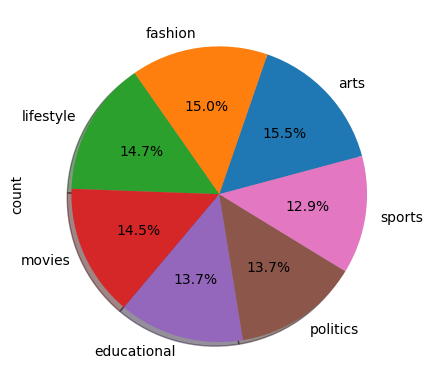

In [35]:
# plot

pc_df.plot.pie(y = 'count',
               labels=pc_df['_id'],
               autopct= '%1.1f%%',
               startangle=15.,
               shadow = True,
               legend= False)

### Número de posts públicos e privado da categoria político.

In [27]:
# Número de posts públicos e privados da categoria politics
pol_sta = posts.aggregate([{"$match": {"Category": "politics"}},
                           {"$group": {"_id": "$status", "count": {"$sum": 1}}}])

In [28]:
ps_df = pd.DataFrame(list(pol_sta))

In [29]:
ps_df

,_id,count
0,public,126
1,private,148


<AxesSubplot:title={'center':'Número de Posts Públicos e Privados'}, xlabel='_id'>

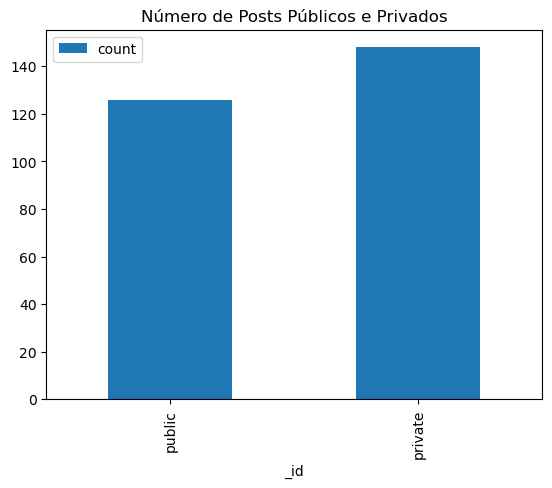

In [39]:
# Plot 

ps_df.plot.bar(x='_id',
              y= 'count',
              title = "Número de Posts Públicos e Privados")

### Qual o ano teve maior número de posts?

In [30]:
# Retorna 1 item
posts.find_one()

{'_id': ObjectId('654a345d429b2aa6d19a2bee'),
 'status': 'public',
 'creationDate': '2017-07-17T20:05:49Z',
 'allowComments': True,
 'title': 'ligula nec sem duis aliquam',
 'description': 'in felis eu sapien cursus vestibulum proin eu mi nulla ac enim in tempor turpis nec euismod scelerisque quam turpis adipiscing lorem vitae mattis nibh ligula nec sem duis aliquam convallis nunc proin at turpis a pede posuere nonummy integer non velit donec diam neque vestibulum eget vulputate ut ultrices vel augue vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia curae donec pharetra magna vestibulum aliquet ultrices erat tortor sollicitudin mi sit amet lobortis sapien sapien non mi integer ac neque duis bibendum morbi non',
 'tags': 1,
 'Category': 'lifestyle',
 'filteredPicture': False}

In [31]:
# update many (cria duas novas variáveis para cada documento)

datalake.posts.update_many({}, {'$set': {"hour":0}});
datalake.posts.update_many({}, {'$set': {"year":0}});

In [32]:
# Retorna 1 item
posts.find_one()

{'_id': ObjectId('654a345d429b2aa6d19a2bee'),
 'status': 'public',
 'creationDate': '2017-07-17T20:05:49Z',
 'allowComments': True,
 'title': 'ligula nec sem duis aliquam',
 'description': 'in felis eu sapien cursus vestibulum proin eu mi nulla ac enim in tempor turpis nec euismod scelerisque quam turpis adipiscing lorem vitae mattis nibh ligula nec sem duis aliquam convallis nunc proin at turpis a pede posuere nonummy integer non velit donec diam neque vestibulum eget vulputate ut ultrices vel augue vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia curae donec pharetra magna vestibulum aliquet ultrices erat tortor sollicitudin mi sit amet lobortis sapien sapien non mi integer ac neque duis bibendum morbi non',
 'tags': 1,
 'Category': 'lifestyle',
 'filteredPicture': False,
 'hour': 0,
 'year': 0}

In [33]:
# Update one (atualiza as duas variáveis com os valores correspondentes extraídos da coluna de data)
for data in posts.find({}):
    posts.update_one({"_id": data['_id']},
                     {'$set': {'hour' : data['creationDate'].split('T')[1].split(':')[0],
                               'year' : data['creationDate'].split('T')[0].split('-')[0] }})

In [34]:
# Retorna 1 item
posts.find_one()

{'_id': ObjectId('654a345d429b2aa6d19a2bee'),
 'status': 'public',
 'creationDate': '2017-07-17T20:05:49Z',
 'allowComments': True,
 'title': 'ligula nec sem duis aliquam',
 'description': 'in felis eu sapien cursus vestibulum proin eu mi nulla ac enim in tempor turpis nec euismod scelerisque quam turpis adipiscing lorem vitae mattis nibh ligula nec sem duis aliquam convallis nunc proin at turpis a pede posuere nonummy integer non velit donec diam neque vestibulum eget vulputate ut ultrices vel augue vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia curae donec pharetra magna vestibulum aliquet ultrices erat tortor sollicitudin mi sit amet lobortis sapien sapien non mi integer ac neque duis bibendum morbi non',
 'tags': 1,
 'Category': 'lifestyle',
 'filteredPicture': False,
 'hour': '20',
 'year': '2017'}

In [35]:
# Agregação
posts_yr = posts.aggregate([{"$group": {"_id": "$year", "count": {"$sum": 1}}},
                            {"$sort": {"_id.year": 1, "count": 1}}])

In [36]:
py_df = pd.DataFrame(list(posts_yr))
py_df

,_id,count
0,2015,76
1,2016,299
2,2019,303
3,2017,309
4,2021,330
5,2020,334
6,2018,349


<AxesSubplot:title={'center':'Número de Posts Por Ano'}, xlabel='_id'>

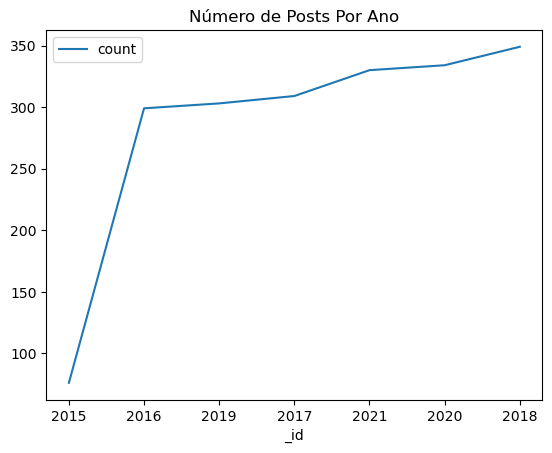

In [37]:
# Plot
py_df.plot.line(x = '_id',
                y = 'count',
                title = "Número de Posts Por Ano")

### Qual o hórario com maior número de posts?

In [38]:
# Agregação e ordenação
posts_hr = posts.aggregate([{"$group": {"_id": "$hour", "count": {"$sum": 1}}},
                            {"$sort": {"_id.hour": 1, "count": -1}}])

In [39]:
for i in range(3):
    print(posts_hr.next())

{'_id': '00', 'count': 103}
{'_id': '08', 'count': 101}
{'_id': '02', 'count': 99}


### Número de posts em hora cheia (terminada por 00) pos categoria.

In [40]:
# Filtro, agregação e ordenação
cat_00 = posts.aggregate([{"$match": {"hour": "00"}},
                          {"$group": {"_id": "$Category", "count": {"$sum": 1}}},
                          {"$sort": {"_id.Category": 1, "count": -1}}])

In [41]:
c0_df = pd.DataFrame(list(cat_00))
c0_df


,_id,count
0,lifestyle,19
1,movies,18
2,educational,17
3,fashion,15
4,politics,14
5,arts,11
6,sports,9


<AxesSubplot:title={'center':'Número de Posts em Hora Cheia'}, xlabel='_id'>

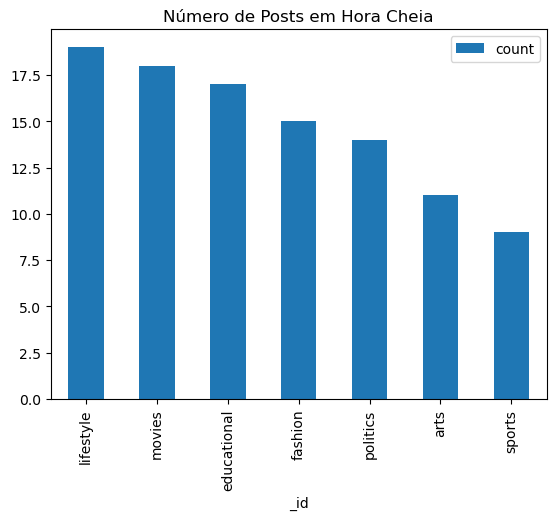

In [42]:
c0_df.plot.bar(x = '_id', y = 'count', title = "Número de Posts em Hora Cheia")

In [164]:
# Define Panel widgets
Horas_slider = pn.widgets.IntSlider(name='slider', start= 00, end=24, step=5, value=24)
Horas_slider

IntSlider(end=24, name='slider', step=5, value=24)

In [165]:
# Radio buttons for horas widgets

horas_source = pn.widgets.RadioButtonGroup(
    name='filtro', 
    options=[19, 18, 17,15,14,11,9],
    button_type='success'
)

In [167]:
bound_plot = pn.bind(create_bar_plot, slider=Horas_slider, filtro = horas_source)

In [155]:
# Make DataFrame Pipeline Interactive
idf = c0_df.interactive()

### Número de posts que permitem comentários .

In [43]:
# count

com = posts.count_documents({'allowComments': True})

In [44]:
print("Número de Posts Que Permitem Comentários:", com)

Número de Posts Que Permitem Comentários: 964


In [45]:
print("Número de Posts Que Não Permitem Comentários:", n-com)

Número de Posts Que Não Permitem Comentários: 1036


C:\Users\ROBERTO\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Número de Posts')

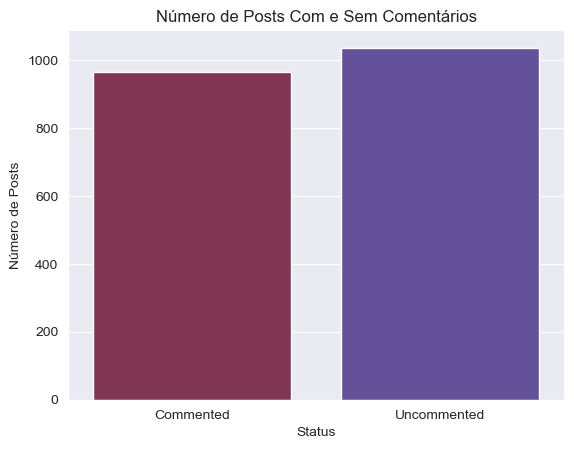

In [46]:
# Plot
sns.set_style('darkgrid')
x = ['Commented', 'Uncommented']
y = [com, n-com]
sns.barplot(x, y, palette = 'twilight_r')
plt.title("Número de Posts Com e Sem Comentários")
plt.xlabel("Status")
plt.ylabel("Número de Posts")

### Comprimento(número de palavras) do título dos posts

In [47]:
# Retorna 1 item
posts.find_one()

{'_id': ObjectId('654a345d429b2aa6d19a2bee'),
 'status': 'public',
 'creationDate': '2017-07-17T20:05:49Z',
 'allowComments': True,
 'title': 'ligula nec sem duis aliquam',
 'description': 'in felis eu sapien cursus vestibulum proin eu mi nulla ac enim in tempor turpis nec euismod scelerisque quam turpis adipiscing lorem vitae mattis nibh ligula nec sem duis aliquam convallis nunc proin at turpis a pede posuere nonummy integer non velit donec diam neque vestibulum eget vulputate ut ultrices vel augue vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia curae donec pharetra magna vestibulum aliquet ultrices erat tortor sollicitudin mi sit amet lobortis sapien sapien non mi integer ac neque duis bibendum morbi non',
 'tags': 1,
 'Category': 'lifestyle',
 'filteredPicture': False,
 'hour': '20',
 'year': '2017'}

In [48]:
# Cria uma nova coluna
datalake.posts.update_many({}, {'$set': {"length_of_heading": 0}});

In [49]:
# Loop para preencher a nova coluna
for data in posts.find({}):
    posts.update_one({"_id": data['_id']},
                     {'$set': {'length_of_heading' : len(data['title'].split(' '))}})

In [50]:
# Agrupamento e ordenação
len_titles = posts.aggregate([{"$group": {"_id": "$length_of_heading", "count": {"$sum": 1}}},
                              {"$sort": {"_id.length_of_heading": 1, "count": -1}}])

In [51]:
len_titles 

In [52]:
title_df = pd.DataFrame(list(len_titles))
title_df.head(10)

,_id,count
0,3,355
1,4,345
2,1,343
3,5,337
4,6,336
5,2,284


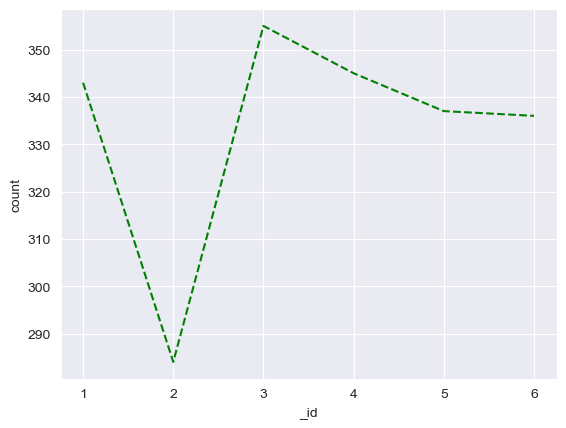

In [53]:
# Plot
ax = sns.lineplot(x = '_id', y = 'count', data = title_df, color = 'green')
ax.lines[0].set_linestyle("--")
plt.show()

### Número de tags por categoria de posts

In [54]:
# Agregação
tags = posts.aggregate([{"$group": {"_id": "$tags", "count": {"$sum": 1}}},
                        {"$sort": {"_id.tags": 1, "count": -1}}])

In [55]:
cat_tags = posts.find({'tags': {'$gt':0}}, {'Category':1})
cat_tags

In [56]:
# Categorias com posts com maior número de tags, sendo o número de tags maior do que zero
cat_tags = posts.aggregate([{"$match": {"tags": {"$gt":0}}},
                            {"$group": {"_id": "$Category", "count": {"$sum": 1}}},
                            {"$sort": {"_id.tags": 1, "count": -1}}])

In [57]:
ct_df = pd.DataFrame(list(cat_tags))
ct_df

,_id,count
0,fashion,276
1,arts,276
2,movies,264
3,lifestyle,262
4,politics,258
5,educational,255
6,sports,235


<AxesSubplot:xlabel='_id', ylabel='count'>

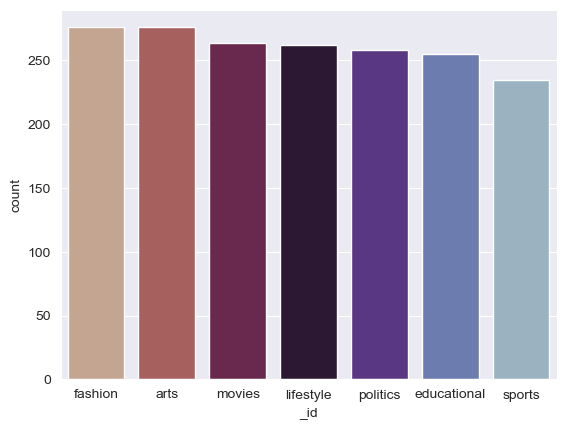

In [58]:
sns.barplot(x = '_id', y = 'count', data = ct_df, palette = 'twilight_r')

> Qual a categoria usa mais filtros de fotos/imagens?

In [59]:
# Filtro, agregação e ordenação
cat_fs = posts.aggregate([{"$match": {"filteredPicture": True}},
                          {"$group":{"_id": "$Category", "count": {"$sum": 1}}},
                          {"$sort": {"_id.tags": 1, "count": -1}}])

In [60]:
for i in range(7):
    print(cat_fs.next())

{'_id': 'fashion', 'count': 159}
{'_id': 'movies', 'count': 154}
{'_id': 'arts', 'count': 146}
{'_id': 'lifestyle', 'count': 136}
{'_id': 'educational', 'count': 135}
{'_id': 'politics', 'count': 131}
{'_id': 'sports', 'count': 117}


> Nível Ninja: Qual categoria tem posts (descrição) mais longos (com maior número de palavras), acima de 60 caracteres?

In [61]:
# Cria a variável
datalake.posts.update_many({}, {'$set': {"length_of_des": 0}});

In [62]:
# Loop para preencher a variável
for data in posts.find({}):
    posts.update_one({"_id": data['_id']}, {'$set': {'length_of_des': len(data['description'].split(' '))}})

In [63]:
# Filtro, agregação e ordenação
cat_des = posts.aggregate([{"$match": {"length_of_des": {"$gte":60}}},
                           {"$group":{"_id": "$Category", "count": {"$sum": 1}}},
                           {"$sort": {"_id.tags": 1, "count": -1}}])

In [64]:
for i in range(7):
    print(cat_des.next())

{'_id': 'arts', 'count': 178}
{'_id': 'fashion', 'count': 161}
{'_id': 'movies', 'count': 159}
{'_id': 'lifestyle', 'count': 156}
{'_id': 'educational', 'count': 156}
{'_id': 'politics', 'count': 146}
{'_id': 'sports', 'count': 130}


> Nível Ninja das Galáxias: O número de posts (descrição) varia de acordo com a hora do dia? Aumenta ou diminui?

In [65]:
# Agregação e ordenação por hora e categoria
posts_hr = posts.aggregate([{"$group": {"_id": ["$hour", "$Category"], "count": {"$sum": 1}}},
                            {"$sort": {"_id.hour": 1, "count": -1}}])

In [66]:
postshr_df = pd.DataFrame(posts_hr)
postshr_df

,_id,count
0,"[11, arts]",23
1,"[08, politics]",21
2,"[16, lifestyle]",20
3,"[11, educational]",20
4,"[00, lifestyle]",19
...,...,...
163,"[13, sports]",5
164,"[06, sports]",5
165,"[22, politics]",5
166,"[11, lifestyle]",4


In [67]:
# Split
split_df = pd.DataFrame(postshr_df ['_id'].to_list(), columns = ['hour', 'category'])
split_df

,hour,category
0,11,arts
1,08,politics
2,16,lifestyle
3,11,educational
4,00,lifestyle
...,...,...
163,13,sports
164,06,sports
165,22,politics
166,11,lifestyle


In [68]:
# Concatenação
df = pd.concat([split_df, postshr_df['count']], axis = 1)
df

,hour,category,count
0,11,arts,23
1,08,politics,21
2,16,lifestyle,20
3,11,educational,20
4,00,lifestyle,19
...,...,...,...
163,13,sports,5
164,06,sports,5
165,22,politics,5
166,11,lifestyle,4


In [69]:
df.head(10)

,hour,category,count
0,11,arts,23
1,08,politics,21
2,16,lifestyle,20
3,11,educational,20
4,00,lifestyle,19
5,02,lifestyle,19
6,05,arts,19
7,10,fashion,19
8,13,fashion,18
9,00,movies,18


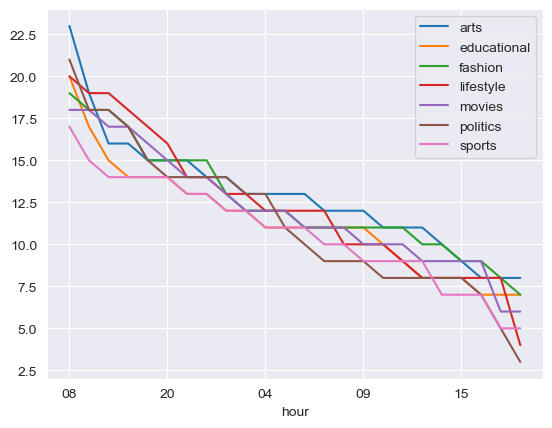

In [70]:
# Plot
fig, ax = plt.subplots()
for key, grp in df.groupby(['category']):
    ax = grp.plot(ax = ax, kind = 'line', x = 'hour', y = 'count', label = key)

plt.legend(loc = 'best')
plt.show()

# Fim